# Analysing Baby Names

Before we start work, first import the necessary names and set matplotlib to put plots inline:

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Get the data from ssa.gov if the 'data' folder does not exist:
(note: this won't work on Windows, you will have to manually download the zip and extract to a folder called 'data')

In [2]:
import os.path
if not os.path.exists("data"): 
    url = "https://www.ssa.gov/oact/babynames/names.zip"
    print(url)
    !wget {url} && mkdir data && unzip names.zip -d data && rm names.zip

Let's have a look at one of the files. We can use the ipython !cat command (on windows), and/or read the file into a pandas 'DataFrame':

In [3]:
!head data/yob2015.txt

In [4]:
import pandas as pd
names = pd.read_csv("data/yob2015.txt", names=['name', 'gender', 'n'])
names.head(5)

,name,gender,n
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504


To get the most popular boy's names, select on gender and sort by n:

In [5]:
boys = names[names.gender == "M"]
boys = boys.sort_values("n", ascending=False)
boys.head(5)

,name,gender,n
18993,Noah,M,19511
18994,Liam,M,18281
18995,Mason,M,16535
18996,Jacob,M,15816
18997,William,M,15809


Let's calculate the total number of boys and girls:

In [6]:
names.groupby('gender')['n'].sum()

gender
F    1769325
M    1898858
Name: n, dtype: int64

We can also ask how often specific names have been used:

In [7]:
mynames = ("John", "Juan", "Mary", "Maria")
names[(names.name.isin(mynames)) & (names.n > 100)]

,name,gender,n
108,Maria,F,2803
123,Mary,F,2602
19018,John,M,10303
19106,Juan,M,3510


# Combining data from all years
So far, we've looked at the 2015 data. But we've downloaded all data from 1880! To make it easier to analyse all data, let's create a data frame containing all data:

In [8]:
years = []
for year in range(1880, 2016):
    fn = "data/yob{year}.txt".format(year=year)
    d = pd.read_csv(fn, names=["name", "gender", "n"])
    d['year'] = year
    years.append(d)
    
names = pd.concat(years, ignore_index=True)
names.head(5)

,name,gender,n,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Let's now plot the total number of births per year per gender:

In [9]:
total = names.pivot_table("n", index="year", columns="gender", aggfunc="sum")
total.head()

gender,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


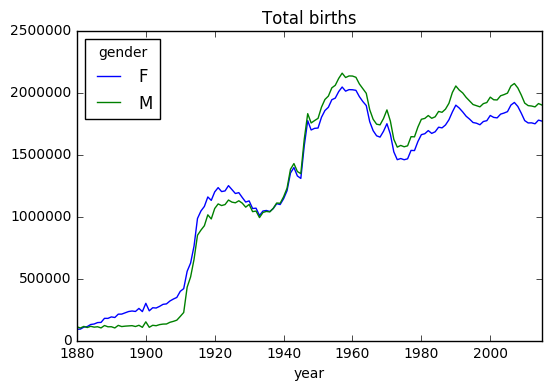

In [11]:
total.plot(title='Total births');